## **Import necessary libraries and dataset:**
To conduct data preprocessing tasks in Python, it is essential to import specific pre-existing Python libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.s by tats import zscore

Downloaded Avocado dataset from Kaggle and Uploaded it in Google Collab

In [ ]:
df_normalized=pd.read_csv('/content/avocado_processed_data.csv')

Dataset loaded successfully

In [ ]:
df_normalized.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Day,Month,Year,Small Bags Ratio,Large Bags Ratio,XLarge Bags Ratio,AveragePrice per Unit Volume
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.866667,1.000000,0.0,0.989278,0.010722,0.0,0.001100
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.633333,1.000000,0.0,0.989744,0.010256,0.0,0.001308
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.400000,1.000000,0.0,0.987338,0.012662,0.0,0.000418
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.166667,1.000000,0.0,0.976982,0.023018,0.0,0.000726
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.933333,0.909091,0.0,0.968032,0.031968,0.0,0.001333



## **Linear regression**

Produce scatterplots for each of the independent variable against the dependent variable (price)

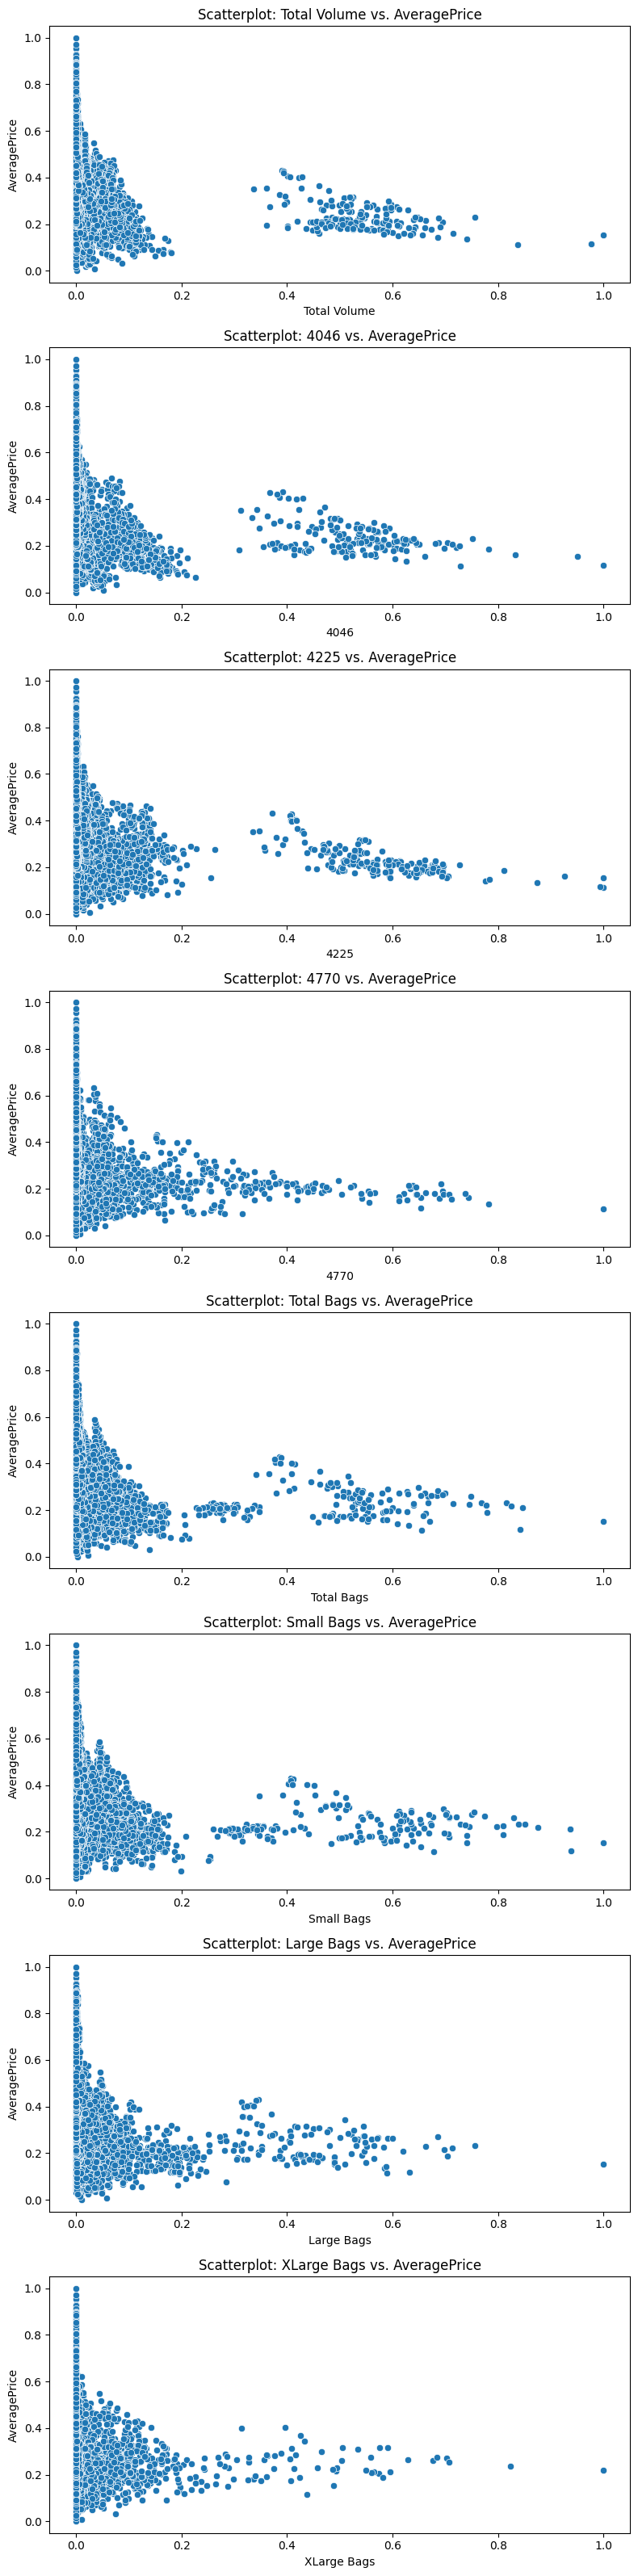

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical independent variables
numerical_independent_variables = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_independent_variables), ncols=1, figsize=(8, 4 * len(numerical_independent_variables)))

# Create scatterplots
for i, variable in enumerate(numerical_independent_variables):
    sns.scatterplot(x=df_normalized[variable], y=df_normalized['AveragePrice'], ax=axes[i])
    axes[i].set_title(f'Scatterplot: {variable} vs. AveragePrice')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('AveragePrice')

plt.tight_layout()
plt.show()


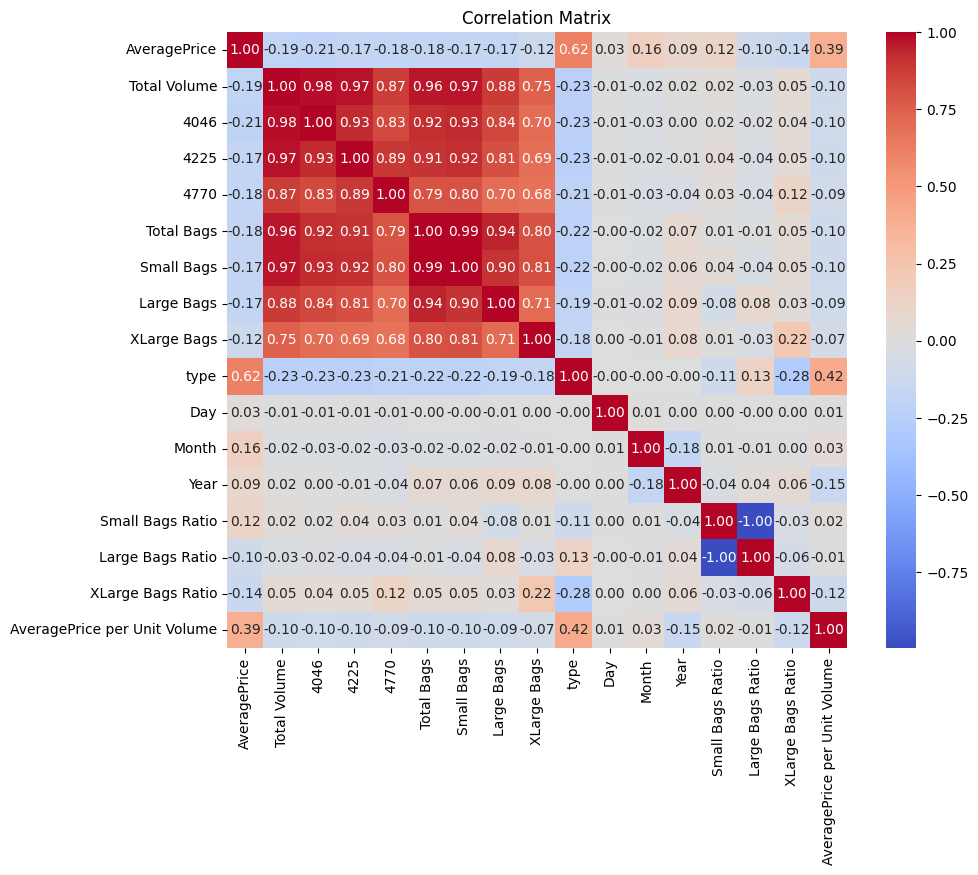

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = df_normalized.select_dtypes(include=['int64', 'float64']).columns
# Assuming df_normalized is your DataFrame with numerical columns
correlation_matrix = df_normalized[numerical_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Calculate the mean positive and negative correlations with 'AveragePrice'
mean_positive_corr = 0
mean_negative_corr = 0
positive_count = 0
negative_count = 0

# Assuming average_price_correlation is your correlation coefficients
# Replace this with your actual correlation coefficients
average_price_correlation = df_normalized.corr()['AveragePrice']

for corr in average_price_correlation:
    if corr > 0:
        mean_positive_corr += corr
        positive_count += 1
    elif corr < 0:
        mean_negative_corr += corr
        negative_count += 1

if positive_count > 0:
    mean_positive_corr /= positive_count

if negative_count > 0:
    mean_negative_corr /= negative_count

print("Mean positive correlation with AveragePrice:", mean_positive_corr)
print("Mean negative correlation with AveragePrice:", mean_negative_corr)


Mean positive correlation with AveragePrice: 0.3439241927394146
Mean negative correlation with AveragePrice: -0.16349141833190906


In [ ]:
# Calculate correlation values for each column with respect to 'AveragePrice'
correlation_with_price = df_normalized.corr()['AveragePrice']

# Separate positively and negatively correlated columns
positive_correlated_columns = []
negative_correlated_columns = []

for column, correlation in correlation_with_price.items():
    if correlation > 0:
        positive_correlated_columns.append((column, correlation))
    elif correlation < 0:
        negative_correlated_columns.append((column, correlation))

# Print positively correlated columns
print("Positively Correlated attributes with Price")
for column, correlation in positive_correlated_columns:
    print(f"{column} - {correlation}")

# Print negatively correlated columns
print("\nNegatively Correlated attributes with Price")
for column, correlation in negative_correlated_columns:
    print(f"{column} - {correlation}")


Positively Correlated attributes with Price
AveragePrice - 1.0
type - 0.6158448927658445
Day - 0.027385651964765854
Month - 0.16240850216569264
Year - 0.09319698370757126
Small Bags Ratio - 0.11675894842960172
AveragePrice per Unit Volume - 0.3918743701424263

Negatively Correlated attributes with Price
Total Volume - -0.19275238715271759
4046 - -0.20831704848788365
4225 - -0.17292777250933483
4770 - -0.17944598397975753
Total Bags - -0.17708792839046658
Small Bags - -0.17472978377396328
Large Bags - -0.17294000978530344
XLarge Bags - -0.11759162287452907
Large Bags Ratio - -0.1040546740305831
XLarge Bags Ratio - -0.1350669723345515


## **Inference From Corelation matrix**
Based on the correlation coefficients with respect to the 'AveragePrice', we can make the following inferences:

**Strong positive correlation:**

type - 0.6158448927658445


**Weak positive correlation:**

Day-0.02

**Weak negative correlation:**

XLarge Bags - -0.11759162287452907

Large Bags Ratio - -0.1040546740305831

XLarge Bags Ratio - -0.1350669723345515

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Split the data into training and testing sets

features=df_normalized[['Total Volume','type','Small Bags Ratio'
       , '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags','Month','Year']]
target=df_normalized['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Print the coefficients and intercept
coefficients_df = pd.DataFrame({'Variable': features.columns, 'Coefficient': model.coef_})
print('\nCoefficients:')
print(coefficients_df)
print('\nIntercept:', model.intercept_)


Mean Squared Error: 0.01
R-squared: 0.46

Coefficients:
            Variable  Coefficient
0       Total Volume -1624.796148
1               type     0.180298
2   Small Bags Ratio     0.095773
3               4046   590.594161
4               4225   532.912871
5               4770    65.844095
6         Total Bags   516.813327
7         Small Bags    -9.501065
8         Large Bags    -3.800215
9              Month     0.078079
10              Year     0.058355

Intercept: 0.12160130759057203


## **Performance Evaluation:**
**r2 Score:**
46%

**Mean Squared Error:**
1%

In [ ]:
import statsmodels.api as sm

# Add a constant term for intercept
features = sm.add_constant(features)

# Fit OLS model
model = sm.OLS(target, features).fit()

# Get summary
summary = model.summary()

# Print the summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:21:40   Log-Likelihood:                 15355.
No. Observations:               18249   AIC:                        -3.069e+04
Df Residuals:                   18237   BIC:                        -3.059e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1203      0.003  